# Introduction to Working with Text in Python


 By: Dr. Eric Godat and Dr. Rob Kalescky
 
 Acknowledgements: Garrett Moore, Jaymie Ruddock

 Adapted from: [Ultimate Guide to deal with Text Data (Using Python)](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/)
 
 Natural Language Toolkit: [Documentation](http://www.nltk.org/)
 
 Reference Text: [Natural Language Processing with Python](http://www.nltk.org/book/)
 

*This tutorial is designed to follow Introduction to Python. If you are not comfortable with basic python programming, consider checking out that lesson first.*

## Setup

These are the basic libraries we will use in for data manipulation (pandas) and math functions (numpy). We will add more libraries as we need them.

As a best practice, it is a good idea to load all your libraries in a single cell at the top of a notebook, however for the purposes of this tutorial we will load them as we go.

In [1]:
import pandas as pd
import numpy as np

Load a data file into a pandas DataFrame.

This tutorial was designed around using sets of data you have yourselves in a form like a CSV, TSV, or TXT file.  Feel free to use any set of data, but for now we will use a dataset created from scraping this [Multilingual Folktale Database](http://www.mftd.org/).

This file is a CSV filetype, common for text data, but your data may also be stored as TSV's, TXT's, or other file types.  This will slightly change how you read from Pandas, but the concept is largely the same for the different filetypes.  Just keep this in mind when you see references to CSV.

To proceed, you will need to have this file downloaded and in the same folder as this notebook. Alternatively you can put the full path to the file.  Typically, your program will look for the file with the name you specified in the folder that contains your program unless you give the program a path to follow.

In [2]:
import glob
glob.glob("*.csv") #Allows us to check the files in the current directory, if folktales.csv is not here, then we need to give the path

['folktales.csv']

In [3]:
filename = 'folktales.csv' #If you need to put the path to the file, do so here.
data = pd.read_csv(filename)#if your filetype is not CSV, you may need to add " , sep = 'separating_character_here' " after the filename.  This may require extra manipulation, so be careful.
#an alternative, depending on your filetype and situation, may be read_table as opposed to read_csv
data.head() # We will use the .head() attribute to limit the amount of the DataFrame is displayed on screen. It is not necessary for computation.

,Unnamed: 0,ATU Code,Author,Country of Origin,Original Title,Source,Story,Story Type,Title,Translated,Year Translated,Year Written
0,17,15.0,Jacob & Wilhelm Grimm,Germany,Katze und Maus in Gesellschaft,NaN,"A cat had made the acquaintance of a mouse, an...",Stealing the Partner's Butter (ATU 15)\n\t\t,Cat and mouse in partnership,Margaret Hunt,1884.0,1812
1,44,123.0,Jacob & Wilhelm Grimm,Germany,Der Wolf und die sieben jungen Geisslein,NaN,There was once an old goat who had seven littl...,The Wolf and the Seven Young Kids (ATU 123)\n...,The Wolf and the Seven Young Kids,Margaret Hunt,1884.0,1812
2,54,516.0,Jacob & Wilhelm Grimm,Germany,Der treue Johannes,The Blue Fairy Book (nr. 30),ONCE upon a time there was an old king who was...,The Petrified Friend (ATU 516)\n\t\t,Trusty John,Andrew Lang,1889.0,1812
3,64,NaN,Jacob & Wilhelm Grimm,Germany,Der gute Handel,NaN,There was once a peasant who had driven his co...,NaN,The good bargain,Margaret Hunt,1884.0,1812
4,74,151.0,Jacob & Wilhelm Grimm,Germany,Der wunderliche Spielmann,NaN,"There was once a wonderful musician, who went ...",Music lessons for wild animals (ATU 151)\n\t\t,The Wonderful Musician,Translated into English,NaN,1812


Here we can see all the information available to us from the file in the form of a Pandas DataFrame. For the remainder of this tutorial, we will focus primarily on the full text of each data chunk, which we will name the *Story* column.  With your data set this is likely to be something very different, so feel free to call is something else.

## EDGAR Database

Here is the [homepage](https://www.sec.gov/edgar.shtml) for the Securities and Exchange Commission's EDGAR database. If you are having trouble finding a specific company, try their [full text search](https://www.sec.gov/edgar/search/#).

Usage documentation for the Python package can be found [here](https://pypi.org/project/edgar/).

Pull the last 5 10-K reports for the Oracle Corporation

In [4]:
from edgar import Company, TXTML
company = Company("Oracle Corp", "0001341439")
tree = company.get_all_filings(filing_type = "10-K")
docs = Company.get_documents(tree, no_of_documents=5)

Parse the most recent 10-K filing for IBM

In [5]:
company = Company("INTERNATIONAL BUSINESS MACHINES CORP", "0000051143")
doc = company.get_10K()
text = TXTML.parse_full_10K(doc)

Search EDGAR for a company Cisco System

In [6]:
from edgar import Edgar
edgar = Edgar()
possible_companies = edgar.find_company_name("Cisco System")
possible_companies

['CISCO SYSTEMS (SWITZERLAND) INVESTMENTS LTD',
 'CISCO SYSTEMS CAPITAL CORP',
 'CISCO SYSTEMS INC',
 'CISCO SYSTEMS INTERNATIONAL B.V.',
 'CISCO SYSTEMS, INC.',
 'L3TV SAN FRANCISCO CABLE SYSTEM, LLC',
 'SPANISH BROADCASTING SYSTEM SAN FRANCISCO INC']

### Simple Example

In [7]:
companies = [['AMAZON COM INC','0001018724'],
            ['Alphabet Inc.','0001652044'],
            ['MICROSOFT CORP','0000789019']
            ]

In [8]:
edgarDF = pd.DataFrame(companies, columns=['Company','CIK'])
edgarDF['MostRecent_10K']=edgarDF.apply(lambda row: TXTML.parse_full_10K(Company(row['Company'],row['CIK']).get_10K()) , axis=1)
edgarDF

,Company,CIK,MostRecent_10K
0,AMAZON COM INC,0001018724,\n\n\n\n\namzn-20201231false2020FY0001018724P3...
1,Alphabet Inc.,0001652044,\n\n\n\n\ngoog-20201231FALSE2020FY0001652044P7...
2,MICROSOFT CORP,0000789019,\n\n\n\n\n\n\n\n\n\n\nmsft-10k_20200630.htm\n\...


#### Last 5 10Ks with Filing Dates

In [9]:
def get_edgar(ll, n):
    filinglist = []
    for el in ll:
        company = Company(el[0], el[1])
        tree = company.get_all_filings(filing_type = "10-K")
        docs = Company.get_documents(tree, no_of_documents=n, as_documents=True)
        texts = Company.get_documents(tree, no_of_documents=n, as_documents=False)
        if n<2:
            docs=[docs]
            texts=[texts]
        for i in range(n):
            date = docs[i].content['Filing Date']
            text = TXTML.parse_full_10K(texts[i])
            filinglist.append([el[0],el[1],date,text])
    df = pd.DataFrame(filinglist, columns=['Company','CIK','10K_Filing','Story'])
    return df

In [10]:
data = get_edgar(companies,5)

## Counting Words and Characters

The first bit of analysis we might want to do is to count the number of words in one piece of data. To do this we will add a column called *wordcount* and write an operation that applies a function to every row of the column.

Unpacking this piece of code, *len(str(x).split(" ")*, tells us what is happening.

For the content of cell *x*, convert it to a string, *str()*, then split that string into pieces at each space, *split()*.

The result of that is a list of all the words in the text and then we can count the length of that list, *len()*.

In [11]:
data['wordcount'] = data['Story'].apply(lambda x: len(str(x).split(" ")))
data[['Story','wordcount']].head()

,Story,wordcount
0,\n\n\n\n\namzn-20201231false2020FY0001018724P3...,34933
1,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,36029
2,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nTa...,35638
3,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...,38136
4,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...,35826


We can do something similar to count the number of characters in the data chunk, including spaces. If you wanted to exclude whitespaces, you could take the list we made above, join it together and count the length of the resulting string.

In [12]:
data = data.fillna("No Information Provided") #If some of our data is missing, this will replace the blank entries. This is only necessary in some cases


In [13]:
data['char_count'] = data['Story'].str.len() ## this also includes spaces, to do it without spaces, you could use something like this: "".join()
data[['Story','char_count']].head()

,Story,char_count
0,\n\n\n\n\namzn-20201231false2020FY0001018724P3...,274004
1,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,305025
2,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nTa...,260659
3,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...,278259
4,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...,264663


Now we want to calculate the average word length in the data.

Let's define a function that will do that for us:

In [14]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

We can now apply that function to all the data chunks and save that in a new column.

In [15]:
data['avg_word'] = data['Story'].apply(lambda x: avg_word(x))
data[['Story','avg_word']].head()

,Story,avg_word
0,\n\n\n\n\namzn-20201231false2020FY0001018724P3...,6.652604
1,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,6.460655
2,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nTa...,5.941362
3,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...,5.933047
4,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...,5.977988


We can then sort by the average word length.

In [16]:
data[['Story','avg_word']].sort_values(by='avg_word', ascending=True).head()

,Story,avg_word
7,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...,5.301764
12,\n\n\n\n\nmsft-10k_20180630.htm\n\n\n\n\n\n \n...,5.546546
14,\n\n10-K\n\n \nTable of Contents\n\n\n\n UNITE...,5.553925
13,\n\n\n\n\nmsft-10k_20170630.htm\n\n\n\n\n\n \n...,5.575125
11,\n\n\n\n\nmsft-10k_20190630.htm\n\n\n\n\n\n \n...,5.580830


### Count Stopwords

Stopwords are words that are commonly used and do little to aid in the understanding of the content of a text. There is no universal list of stopwords and they vary on the style, time period and media from which your text came from.  Typically, people choose to remove stopwords from their data, as it adds extra clutter while the words themselves provide little to no insight as to the nature of the data.  For now, we are simply going to count them to get an idea of how many there are.

For this tutorial, we will use the standard list of stopwords provided by the Natural Language Toolkit python library.

In [17]:
#import nltk
#nltk.download('stopwords')

In [18]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

To count the number of stopwords in a chunk of data, we make a list of all the words in our data that are also in the stopword list. We can then just take the length of that list and store it in a new column

In [19]:
data['stopwords'] = data['Story'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Story','stopwords','wordcount']].head()

,Story,stopwords,wordcount
0,\n\n\n\n\namzn-20201231false2020FY0001018724P3...,11625,34933
1,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,12137,36029
2,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nTa...,11920,35638
3,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...,12853,38136
4,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...,12040,35826


### Other Ways to Count

There are other types of counting we might want to do. These might be more or less relevant depending on the test you are working with.

For completeness, we have put them here but we will skip over them in this tutorial

#### Counting Special Characters

This is really only useful for Twitter or other Internet texts but you could imagine wanting to count quotations or exclamations with something similar.

In [20]:
data['special_char'] = data['Story'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Story','special_char']].head()

,Story,special_char
0,\n\n\n\n\namzn-20201231false2020FY0001018724P3...,0
1,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,0
2,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nTa...,0
3,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...,0
4,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...,0


#### Counting Numbers

This counts the number of numerical digits in a text, which for strict text may not be helpful, but mostly numerical data will make more use of this.

In [21]:
data['numerics'] = data['Story'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Story','numerics']].sort_values(by='numerics', ascending=False).head()

,Story,numerics
10,\n\n\n\n\n\n\n\n\n\n\nmsft-10k_20200630.htm\n\...,1847
12,\n\n\n\n\nmsft-10k_20180630.htm\n\n\n\n\n\n \n...,1539
13,\n\n\n\n\nmsft-10k_20170630.htm\n\n\n\n\n\n \n...,1525
14,\n\n10-K\n\n \nTable of Contents\n\n\n\n UNITE...,1481
11,\n\n\n\n\nmsft-10k_20190630.htm\n\n\n\n\n\n \n...,1400


#### Counting Uppercase

Counting uppercase words could give us an indication of how many sentences or proper nouns are in a text but this is likely too broad to be used to classify either on its own.

In [22]:
data['upper'] = data['Story'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Story','upper']].head()

,Story,upper
0,\n\n\n\n\namzn-20201231false2020FY0001018724P3...,439
1,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,511
2,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nTa...,550
3,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...,553
4,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...,546


# Processing Text

A major component of doing analysis on text is the cleaning of the text prior to the analysis.

Though this process destroys some elements of the text (sentence structure, for example), it is often necessary in order to describe a text analytically. Depending on your choice of cleaning techniques, some elements might be preserved better than others if that is of importance to your analysis.

## Cleaning Up Words

This series of steps aims to clean up and standardize the text itself. This generally consists of removing common elements such as stopwords and punctuation but can be expanded to more detailed removals.

### Lowercase

Here we enforce that all of the text is lowercase. This makes it easier to match cases and sort words.

Notice we are assigning our modified column back to itself. This will save our modifications to our DataFrame

In [23]:
data['Story'] = data['Story'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Story'].head()

0    amzn-20201231false2020fy0001018724p3yp1yp1yus-...
1    document 0.5p1yp1yp1y0029000000false--12-31fy2...
2    document table of contents united statessecuri...
3    document united statessecurities and exchange ...
4    document united statessecurities and exchange ...
Name: Story, dtype: object

### Remove Punctuation

Here we remove all punctuation from the data. This allows us to focus on the words only as well as assist in matching.

In [24]:
data['Story'] = data['Story'].str.replace('[^\w\s]','')
data['Story'].head()

<ipython-input-24-72b5703e4410>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Story'] = data['Story'].str.replace('[^\w\s]','')


0    amzn20201231false2020fy0001018724p3yp1yp1yusga...
1    document 05p1yp1yp1y0029000000false1231fy20190...
2    document table of contents united statessecuri...
3    document united statessecurities and exchange ...
4    document united statessecurities and exchange ...
Name: Story, dtype: object

### Remove Stopwords

Similar to what we did earlier when we counted stopwords, we now want to remove the stopwords. We will again use the NLTK list of stopwords but this time keep a list of words that do not appear in the list of stopwords.

In [25]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [26]:
data['Story'] = data['Story'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Story'].head()

0    amzn20201231false2020fy0001018724p3yp1yp1yusga...
1    document 05p1yp1yp1y0029000000false1231fy20190...
2    document table contents united statessecuritie...
3    document united statessecurities exchange comm...
4    document united statessecurities exchange comm...
Name: Story, dtype: object

### Remove Frequent Words

If we want to catch common words that might have slipped through the stopword removal, we can build out a list of the most common words remaining in our text.

Here we have built a list of the 10 most common words. Some of these words might actually be relevant to our analysis so it is important to be careful with this method.

In [27]:
freq = pd.Series(' '.join(data['Story']).split()).value_counts()[:10]
freq

may          2773
services     2746
tax          2715
income       2609
financial    2463
billion      2189
us           2160
products     2142
revenue      2120
cash         2094
dtype: int64

We now follow the same procedure with which we removed stopwords to remove the most frequent words.

In [28]:
freq = list(freq.index)
data['Story'] = data['Story'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Story'].head()

0    amzn20201231false2020fy0001018724p3yp1yp1yusga...
1    document 05p1yp1yp1y0029000000false1231fy20190...
2    document table contents united statessecuritie...
3    document united statessecurities exchange comm...
4    document united statessecurities exchange comm...
Name: Story, dtype: object

### Remove Rare Words

By analogy, we can remove the most rare words. Some of these are strange misspellings or [hapax legomenon](https://en.wikipedia.org/wiki/Hapax_legomenon) (one off words that don't appear anywhere else in the text).

In [29]:
freq = pd.Series(' '.join(data['Story']).split()).value_counts()[-10:]
freq

leases2194         1
3006               1
companyitem        1
securities31521    1
14354              1
12833              1
2021roger          1
development3942    1
907foreign50       1
100face            1
dtype: int64

Again, removing words following the same process as the stopword removal.

In [30]:
freq = list(freq.index)
data['Story'] = data['Story'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Story'].head()

0    amzn20201231false2020fy0001018724p3yp1yp1yusga...
1    document 05p1yp1yp1y0029000000false1231fy20190...
2    document table contents united statessecuritie...
3    document united statessecurities exchange comm...
4    document united statessecurities exchange comm...
Name: Story, dtype: object

### Correct Spelling

Misspellings can cause inaccuracies in text analysis. For example, "the" and "teh" are likely intended to be the same word and a reader might gloss over that typo, but a computer would view them as distinct.

To help address this we will leverage the [TextBlob package](https://textblob.readthedocs.io/en/dev/) to check the spelling.

Since this can be slow and often of questionable usefulness, we have limited the check to the first 5 rows of our DataFrame.

It is also worth keeping in mind that, much like autocorrect on your phone, the spellchecking here is not going to be perfectly accurate and could result in just as many errors as it fixes (especially if you are working on text from edited or published sources).

### Tokenization

Tokenization is the process of splitting up a block of text into a sequence of words or sentences.

For those familiar with R and the Tidyverse, this would be referred to as unnesting tokens

Here we show all the tokenized words from the first data chunk in our Dataframe.

In [31]:
#import nltk
#nltk.download('punkt')

In [32]:
from textblob import TextBlob

TextBlob(data['Story'][0]).words

WordList(['amzn20201231false2020fy0001018724p3yp1yp1yusgaapaccruedliabilitiescurrentusgaapaccruedliabilitiescurrentusgaapaccruedliabilitiescurrentusgaapaccruedliabilitiescurrentamznleaseliabilitynoncurrentamznleaseliabilitynoncurrentamznleaseliabilitynoncurrentamznleaseliabilitynoncurrentp1yp2y5000010187242020010120201231iso4217usd000101872420200630xbrlishares00010187242021012000010187242017123100010187242018123100010187242019123100010187242018010120181231000101872420190101201912310001018724202012310001018724usgaapproductmember20180101201812310001018724usgaapproductmember20190101201912310001018724usgaapproductmember20200101202012310001018724usgaapservicemember20180101201812310001018724usgaapservicemember20190101201912310001018724usgaapservicemember2020010120201231iso4217usdxbrlishares0001018724usgaapcommonstockmember201712310001018724usgaaptreasurystockmember201712310001018724usgaapadditionalpaidincapitalmember201712310001018724usgaapaccumulatedothercomprehensiveincomemember20171231000

## Stemming

Stemming is the process of removing suffices, like "ed" or "ing".

We will use another standard NLTK package, PorterStemmer, to do the stemming.

In [33]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Story'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    amzn20201231false2020fy0001018724p3yp1yp1yusga...
1    document 05p1yp1yp1y0029000000false1231fy20190...
2    document tabl content unit statessecur exchang...
3    document unit statessecur exchang commissionwa...
4    document unit statessecur exchang commissionwa...
Name: Story, dtype: object

As we can see "wonderful" became "wonder", which could help an analysis, but "deathbed" became "deathb" which is less helpful.

## Lemmatization

Lemmatization is often a more useful approach than stemming because it leverages an understanding of the word itself to convert the word back to its root word. However, this means lemmatization is less aggressive than stemming (probably a good thing).

In [34]:
#import nltk
#nltk.download('wordnet')

In [35]:
from textblob import Word
data['Story'] = data['Story'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Story'].head()

0    amzn20201231false2020fy0001018724p3yp1yp1yusga...
1    document 05p1yp1yp1y0029000000false1231fy20190...
2    document table content united statessecurities...
3    document united statessecurities exchange comm...
4    document united statessecurities exchange comm...
Name: Story, dtype: object

## Visualizing Text

Now, we are going to make a word cloud based on our data set.

In [36]:
import wordcloud

In [37]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
stop_words = set(STOPWORDS)
stop_words.update(["saw"])

If you want to update the stopwords after you see the wordcloud, type them into the empty list above and remove the # sign.

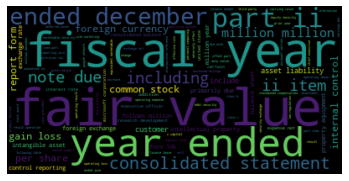

In [38]:
word = " ".join(data['Story'])
wordcloud = WordCloud(stopwords=stop_words, background_color="black").generate(word)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The above code creates a wordcloud based off all the words (except for stop words) in all of the stories. While this can be fun, it may not be as interesting as a wordcloud for a single story. Let's compare:

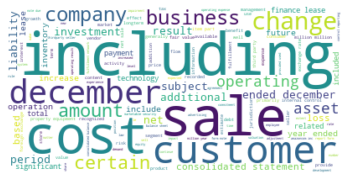

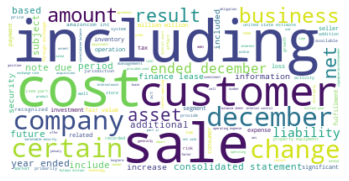

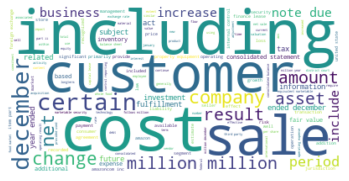

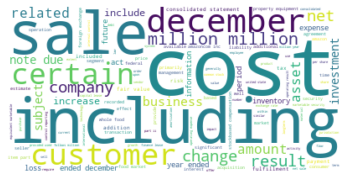

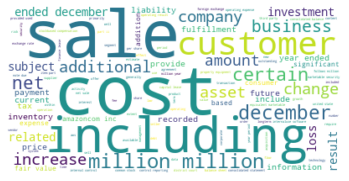

In [39]:
for i in range(0, 5):
    word = data['Story'][i]
    wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(word)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Wrapping Up

At this point we have a several options for cleaning and structuring our text data. We learned how to load data, do basic cleaning and start to analyze our data with some simple counting methods.

We suggest continuing to **Intermediate TextMining** to learn more advanced ways to study text analytically.